# 长期价值投资数据监测

In [14]:
#imports

import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
import getdata as gd
from  matplotlib import pyplot as plt

#init
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, 
            rc={'figure.figsize':(15,10)})
#pd.options.display.float_format = '{:,.2f}'.format

#parameters
ticker_list=['FB','MSFT','AAPL','GOOG','AMZN','BABA',
'NVDA','0700.HK','ADBE','MO','ADSK','ASML','BRK-B',
'GS','ISRG','KO','LVMUY','2318.HK','TSM','ADBE','MCO','1810.HK',
'3690.HK'

]



In [15]:
print('This notebook was refreshed at %s'%(dt.datetime.now()))

This notebook was refreshed at 2022-01-12 18:03:21.007928


## 美国国债收益率监测

In [16]:
df_rate=pd.DataFrame()
data=yf.download(['^IRX','^FVX','^TNX','^TYX'],progress=False)

df_rate=data.loc[dt.date.today()-dt.timedelta(days=365*10):]['Close']
df_rate.columns=['5 Years','13 Weeks','10 Years','30 Years']

In [17]:
s=df_rate.tail(1).style.format('{:.3f}%')
s

,5 Years,13 Weeks,10 Years,30 Years
Date,,,,
2022-01-11 00:00:00,1.507%,0.118%,1.746%,2.073%


Text(0.5, 1.0, '10 years trend of treasury yield')

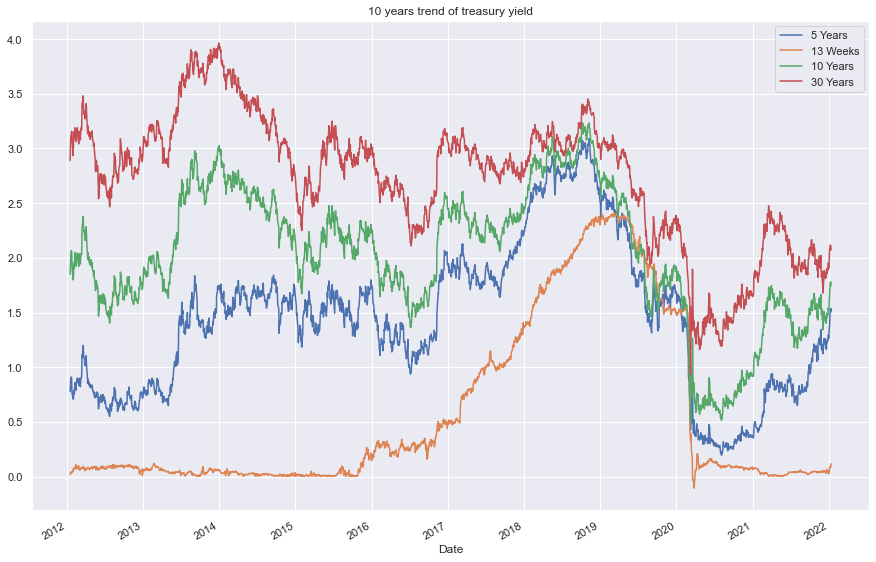

In [18]:
df_rate.plot()
plt.title("10 years trend of treasury yield")

## 股市和国债利率的相关度

## 跟踪公司数据监控

In [19]:

ticker_list=list(dict.fromkeys(ticker_list))
df_port=pd.DataFrame()
df_port['ticker']=ticker_list
df_port['weight']=0

In [20]:
# df_stock=gd.get_port_holding_info(df_port)
# df_stock.to_csv('../data/share/value_port_info.csv')

In [21]:
df_stock=pd.read_csv('../data/share/value_port_info.csv')
df_metric=gd.get_port_holding_metric(df_stock)

In [22]:
df_metric.sort_values(by='drawdown',ascending=True)[['ticker','price','1w_chg_pct','drawdown','target_price','fwd_eps','est_eps_growth','pe_fwd','fwd_peg','pcf','pe_ttm']]\
    .style.format(precision=2,thousands=',')

,ticker,price,1w_chg_pct,drawdown,target_price,fwd_eps,est_eps_growth,pe_fwd,fwd_peg,pcf,pe_ttm
21,3690.HK,209.00,-5.28,-53.92,319.69,-1.02,nan,-200.00,nan,"-1,085.35",nan
5,BABA,128.30,6.58,-52.63,199.82,9.51,34.08,13.49,0.40,11.46,18.09
20,1810.HK,18.22,-2.16,-45.71,28.24,1.21,nan,15.06,nan,32.11,nan
7,0700.HK,460.00,2.22,-39.82,610.06,19.24,74.69,23.91,0.32,20.90,41.76
17,2318.HK,60.90,7.79,-38.62,88.39,4.00,-57.44,15.25,-0.27,10.03,6.49
8,ADBE,525.83,-6.83,-23.61,680.00,16.25,62.18,32.36,0.52,nan,52.48
10,ADSK,262.39,-7.52,-23.34,340.00,6.83,15.22,38.42,2.52,39.37,44.26
11,ASML,727.17,-8.82,-18.02,879.76,19.65,31.00,37.14,1.20,28.62,48.42
6,NVDA,274.00,-9.03,-17.90,350.00,5.21,60.65,52.59,0.87,83.86,84.49
0,FB,328.07,-3.09,-14.16,410.00,14.23,1.83,23.05,12.58,17.02,23.48


In [23]:
df_metric.reindex(columns=['ticker','last_price','1m_chg_pct','target_price','drawdown','pcf','pe_ttm','pe_fwd','revenue_growth','roe','cash_return_rate','cf_margin','net_margin']
).sort_values(by='drawdown').style.format(precision=2,
        formatter={'drawdown':'{:.2f}%',
                    '1m_chg_pct':'{:.2f}%',
                    'revenue_growth':'{:.2f}%',
                    'cash_return_rate':'{:.2f}%',
                    'roe':'{:.2f}%',
                    'gross_margin':'{:.2f}%',
                    'net_margin':'{:.2f}%',
                    'cf_margin':'{:.2f}%',
        
         })

,ticker,last_price,1m_chg_pct,target_price,drawdown,pcf,pe_ttm,pe_fwd,revenue_growth,roe,cash_return_rate,cf_margin,net_margin
21,3690.HK,nan,-16.13%,319.69,-53.92%,-1085.35,nan,-200.00,38.10%,-17.78%,nan%,-0.58%,-12.28%
5,BABA,nan,4.96%,199.82,-52.63%,11.46,18.09,13.49,29.40%,11.25%,nan%,24.15%,15.30%
20,1810.HK,nan,-5.61%,28.24,-45.71%,32.11,nan,15.06,8.20%,22.26%,nan%,3.70%,8.19%
7,0700.HK,nan,-1.41%,610.06,-39.82%,20.90,41.76,23.91,13.50%,24.27%,nan%,31.44%,34.42%
17,2318.HK,nan,5.45%,88.39,-38.62%,10.03,6.49,15.25,2.30%,14.31%,nan%,7.31%,9.12%
8,ADBE,nan,-20.12%,680.00,-23.61%,nan,52.48,32.36,20.00%,34.37%,nan%,nan%,30.55%
10,ADSK,nan,-2.41%,340.00,-23.34%,39.37,44.26,38.42,18.20%,195.55%,nan%,34.79%,31.30%
11,ASML,nan,-4.88%,879.76,-18.02%,28.62,48.42,37.14,32.40%,43.26%,nan%,50.89%,30.54%
6,NVDA,nan,-2.70%,350.00,-17.90%,83.86,84.49,52.59,50.30%,41.94%,nan%,33.54%,33.81%
0,FB,nan,-1.92%,410.00,-14.16%,17.02,23.48,23.05,35.10%,32.10%,nan%,47.73%,35.88%


In [24]:
yf.Ticker('GS').info

{'zip': '10282',
 'sector': 'Financial Services',
 'fullTimeEmployees': 43000,
 'longBusinessSummary': "The Goldman Sachs Group, Inc., a financial institution, provides range of financial services for corporations, financial institutions, governments, and individuals worldwide. It operates through four segments: Investment Banking, Global Markets, Asset Management, and Consumer & Wealth Management. The company's Investment Banking segment provides financial advisory services, including strategic advisory assignments related to mergers and acquisitions, divestitures, corporate defense activities, restructurings, and spin-offs; and middle-market lending, relationship lending, and acquisition financing, as well as transaction banking services. This segment also offers underwriting services, such as equity underwriting for common and preferred stock and convertible and exchangeable securities; and debt underwriting for various types of debt instruments, including investment-grade and high-